Students:

Ali (ali_242361) -  George (george_237618)
*F22- MWS - WDM Assignment* 
----


# Loading data from Kaggle
(Requires an API key to access Kaggle Data, example key is provided in the zip file)


In [2]:
# install  required library 
! pip install -q kaggle
! mkdir ~/.kaggle

# The kaggle.json file contains API creds, you need to provide your own key to be able to download the vehicles dataset.
# please refer to the attached readme for more info
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
# download & unzip data from kaggle after setup is complete
! kaggle datasets download --force austinreese/craigslist-carstrucks-data
! unzip /content/craigslist-carstrucks-data.zip

 94% 248M/262M [00:02<00:00, 96.7MB/s]
100% 262M/262M [00:02<00:00, 95.0MB/s]
Archive:  /content/craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


# Reading data into Pandas dataframes

In [2]:
import pandas as pd
import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
#loading data into a pandas dataframe 
vehicles = pd.read_csv('/content/vehicles.csv')


In [15]:
# getting a copy so we don't perform ops on original dataset
df = vehicles.copy()
columns = ['price','year','manufacturer','condition','cylinders','fuel','odometer','title_status','transmission','drive','type','paint_color','description']
df=df[columns]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  description   426810 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


#Data Preprocessing

## removing probably useless data

In [16]:
# remove rows with all missing values
df.dropna(how='all', inplace=True)

#remove rows with mostly missing values
# df.dropna(thresh=3,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  description   426810 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


##Fixing Data Types and filling missing values 

Converting units to integers (from a glance we can notice that the price does not actually contain any decimals; years are integers; odometer is in meters and can only be of type integer)

In [17]:
to_be_Int = ['price','year','odometer']
for column in to_be_Int:
    df[column].fillna(df[column].mean(), inplace = True)
    df[column]= df[column].round().astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         426880 non-null  int64 
 1   year          426880 non-null  int64 
 2   manufacturer  409234 non-null  object
 3   condition     252776 non-null  object
 4   cylinders     249202 non-null  object
 5   fuel          423867 non-null  object
 6   odometer      426880 non-null  int64 
 7   title_status  418638 non-null  object
 8   transmission  424324 non-null  object
 9   drive         296313 non-null  object
 10  type          334022 non-null  object
 11  paint_color   296677 non-null  object
 12  description   426810 non-null  object
dtypes: int64(3), object(10)
memory usage: 42.3+ MB


In [18]:
# Filling missing categorical values
categorical_columns = ['manufacturer', 'condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','description']
most_frequent_item = {}
label_encoders={}
for column in categorical_columns:
    most_frequent_item[column] = df[column].mode()[0]


for column in categorical_columns:
  df[column].fillna( most_frequent_item[column], inplace = True)


df.head()



,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description
0,6000,2011,ford,good,6 cylinders,gas,98043,clean,automatic,4wd,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...
1,11900,2011,ford,good,6 cylinders,gas,98043,clean,automatic,4wd,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...
2,21000,2011,ford,good,6 cylinders,gas,98043,clean,automatic,4wd,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...
3,1500,2011,ford,good,6 cylinders,gas,98043,clean,automatic,4wd,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...
4,4900,2011,ford,good,6 cylinders,gas,98043,clean,automatic,4wd,sedan,white,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...


##Encoding Categorical values

In [19]:
from sklearn import preprocessing

# prepare encoders
category_le = {}
for column in categorical_columns:
  category_le[column] = preprocessing.LabelEncoder()
for column in categorical_columns:
  category_le[column].fit(df[column])

# encode labels
for column in categorical_columns:
  df[column] = category_le[column].transform(df[column])


print(df['drive'].unique())


# Decoding (commented; For checking only)
# for column in categorical_columns:
#   df[column] = category_le[column].inverse_transform(df[column])


# print(df['drive'].unique())

df.info()

[0 2 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   price         426880 non-null  int64
 1   year          426880 non-null  int64
 2   manufacturer  426880 non-null  int64
 3   condition     426880 non-null  int64
 4   cylinders     426880 non-null  int64
 5   fuel          426880 non-null  int64
 6   odometer      426880 non-null  int64
 7   title_status  426880 non-null  int64
 8   transmission  426880 non-null  int64
 9   drive         426880 non-null  int64
 10  type          426880 non-null  int64
 11  paint_color   426880 non-null  int64
 12  description   426880 non-null  int64
dtypes: int64(13)
memory usage: 42.3 MB


##Evaluating correlations to choose relevant input columns

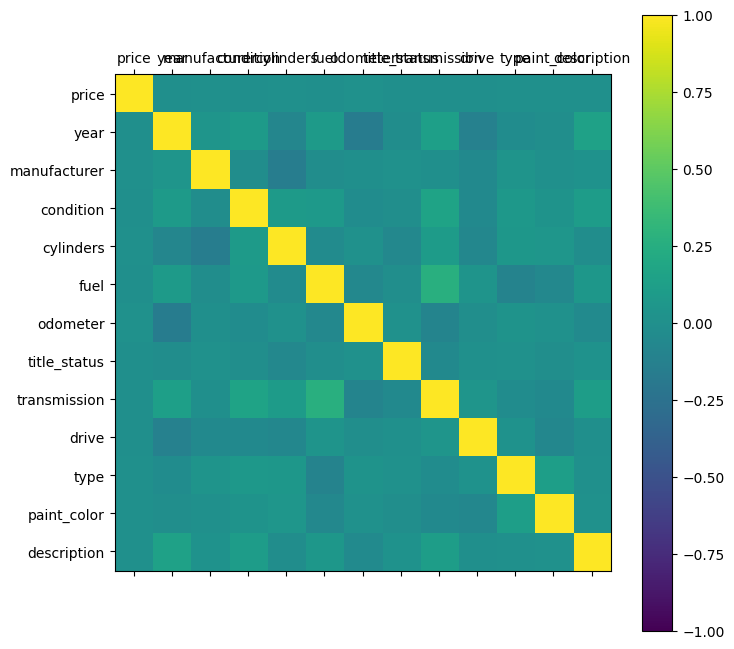

In [20]:
import matplotlib.pyplot as plt
#calculcate correlations
correlations = df.corr(method='pearson')
 
#create figure
fig = plt.figure(figsize=(8,8))

#create new plot
ax = fig.add_subplot(1,1,1)

# displya matrix
cax = ax.matshow(correlations, vmin=-1, vmax=1)
# display legend (color bar)
fig.colorbar(cax)

#create new ticks
ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12]

#add ticks to x andnad y axis
ax.set_xticks(ticks)
ax.set_yticks(ticks)

#add labels to x andnad y axis

ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

#display plot
plt.show()

## removing unneeded columns based on corrolation Matrix and preparing data for models

In [21]:
# dropping irrelevant columns
# features= ['odometer','cylinders','fuel','paint_color','type','price','transmission','drive','condition' ]
# df = df[features]
# df.info()

#Logistic Regression Model

##Preparing Data

In [15]:
# splitting data
from sklearn.model_selection import train_test_split
X = df.drop(['type'],axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##Training Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# we need to scale our input data (training set and testing set) so the model can work more resourcefully
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a logistic Regression classifier object, max_iter=1000 for better results
model_LR = LogisticRegression(max_iter=1000)

#confirming that scaling did not affect data set size (they're of equal size ==> correct)
print(X_scaled.shape)
print(y_train.shape)

# Fiting model with training data using fit() method
model_LR.fit(X_scaled, y_train)




(341504, 12)
(341504,)


LogisticRegression(max_iter=1000)

##Generating Performance Metrics Report

In [17]:
from sklearn.metrics import classification_report


#Classification Report
print('\nClassification Report\n')
actual = y_test
predicted = model_LR.predict(X_test)
types = ['pickup', 'truck', 'mini-van', 'hatchback', 'SUV', 'coupe', 'bus', 'sedan', 'convertible', 'wagon', 'other', 'van', 'offroad']




print(classification_report(actual, predicted, target_names=types))


Classification Report

              precision    recall  f1-score   support

      pickup       0.36      0.15      0.22     15459
       truck       0.00      0.00      0.00        89
    mini-van       0.12      0.01      0.01      1524
   hatchback       0.40      0.21      0.27      3826
         SUV       0.27      0.07      0.12      3275
       coupe       0.00      0.00      0.00       945
         bus       0.00      0.00      0.00       109
       sedan       0.18      0.03      0.06      4481
 convertible       0.38      0.17      0.24      8684
       wagon       0.47      0.89      0.61     35964
       other       0.50      0.20      0.29      7143
         van       0.00      0.00      0.00      1685
     offroad       0.00      0.00      0.00      2192

    accuracy                           0.45     85376
   macro avg       0.21      0.13      0.14     85376
weighted avg       0.38      0.45      0.37     85376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# accuracy
print('Accuracy: {:.2f}\n'.format(accuracy_score(actual,predicted)))

# micro
print('Maicro scores\n')
print('Micro Precision: {:.2f}'.format(precision_score(actual,predicted, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(actual,predicted, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(actual,predicted, average='micro')))

# macro
print('Macro scores\n')
print('Macro Precision: {:.2f}'.format(precision_score(actual,predicted, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(actual,predicted, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(actual,predicted, average='macro')))

# weighted
print('Weighted scores\n')
print('Weighted Precision: {:.2f}'.format(precision_score(actual,predicted,  average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(actual,predicted,  average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(actual,predicted,  average='weighted')))

Accuracy: 0.45

Mairo scores

Micro Precision: 0.45
Micro Recall: 0.45
Micro F1-score: 0.45

Macro scores

Macro Precision: 0.21
Macro Recall: 0.13
Macro F1-score: 0.14

Weighted scores

Weighted Precision: 0.38
Weighted Recall: 0.45
Weighted F1-score: 0.37


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Generating ROC for Logistic Regression Classifier (one vs all)

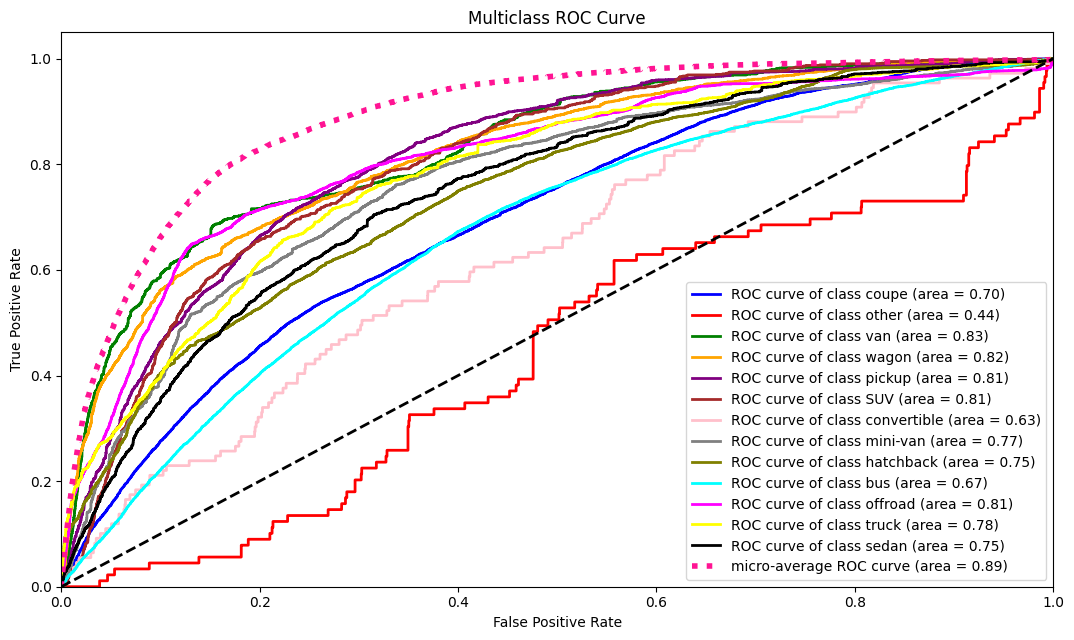

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11,12])
types = ['coupe', 'other', 'van', 'wagon', 'pickup', 'SUV', 'convertible', 'mini-van', 'hatchback', 'bus', 'offroad', 'truck', 'sedan']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(13):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_LR.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model_LR.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
fig = plt.gcf()
fig.set_size_inches(2 * fig.get_figwidth(), 1.5 * fig.get_figheight())
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black']
for i in range(13):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(types[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Decision Tree Model


##Training Model

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier object
model_DT = DecisionTreeClassifier(criterion="entropy")

# splitting data
from sklearn.model_selection import train_test_split
X = df.drop(['type'],axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Train the classifier with training data using fit() method
model_DT.fit(X_train, y_train)

# Predict target variable for test data using predict() method
y_pred = model_DT.predict(X_test)

## Generating Text Tree

In [11]:
# THIS CODE TAKES LONG TIME TO RUN, this is why we took it out of quick execution by commenting it
# the code draws the decision tree

# from sklearn import tree
# from matplotlib import pyplot

# target_names= np.array(list(set(category_le['type'].inverse_transform(df['type']))))
# print(target_names)

# features = ['price','year','manufacturer','condition','cylinders','fuel','odometer','title_status','transmission','drive','paint_color','description']
# fig = pyplot.figure(figsize=(8,8))

# _ = tree.plot_tree(model, 
#                    feature_names=features,  
#                    class_names=target_names,
#                    filled=True)

##Generating Performance Metrics Report

In [31]:
from sklearn.metrics import classification_report

#Classification Report
print('\nClassification Report\n')

actual = y_test
predicted = model_DT.predict(X_test)

types=['pickup','truck','mini-van','hatchback','suv','coupe','bus','sedan','convertible','wagon','other','van','offroad',]
print(classification_report(actual, predicted, target_names=types))


Classification Report

              precision    recall  f1-score   support

      pickup       0.73      0.73      0.73     15477
       truck       0.57      0.55      0.56       114
    mini-van       0.59      0.59      0.59      1501
   hatchback       0.66      0.67      0.67      3700
         suv       0.70      0.69      0.69      3358
       coupe       0.54      0.55      0.54       980
         bus       0.24      0.25      0.24       129
       sedan       0.78      0.81      0.80      4411
 convertible       0.80      0.79      0.79      8644
       wagon       0.82      0.81      0.82     36138
       other       0.73      0.74      0.73      7059
         van       0.65      0.66      0.66      1668
     offroad       0.63      0.67      0.65      2197

    accuracy                           0.76     85376
   macro avg       0.65      0.65      0.65     85376
weighted avg       0.76      0.76      0.76     85376



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

actual = y_test
predicted = model_DT.predict(X_test)

# accuracy
print('Accuracy: {:.2f}\n'.format(accuracy_score(actual,predicted)))

# micro
print('Micro scores\n')
print('Micro Precision: {:.2f}'.format(precision_score(actual,predicted, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(actual,predicted, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(actual,predicted, average='micro')))

# macro
print('Macro scores\n')
print('Macro Precision: {:.2f}'.format(precision_score(actual,predicted, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(actual,predicted, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(actual,predicted, average='macro')))

# weighted
print('Weighted scores\n')
print('Weighted Precision: {:.2f}'.format(precision_score(actual,predicted,  average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(actual,predicted,  average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(actual,predicted,  average='weighted')))

Accuracy: 0.76

Micro scores

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro scores

Macro Precision: 0.65
Macro Recall: 0.65
Macro F1-score: 0.65

Weighted scores

Weighted Precision: 0.76
Weighted Recall: 0.76
Weighted F1-score: 0.76


##Generating ROC for Decision Tree Classifier (One-vs-Rest)

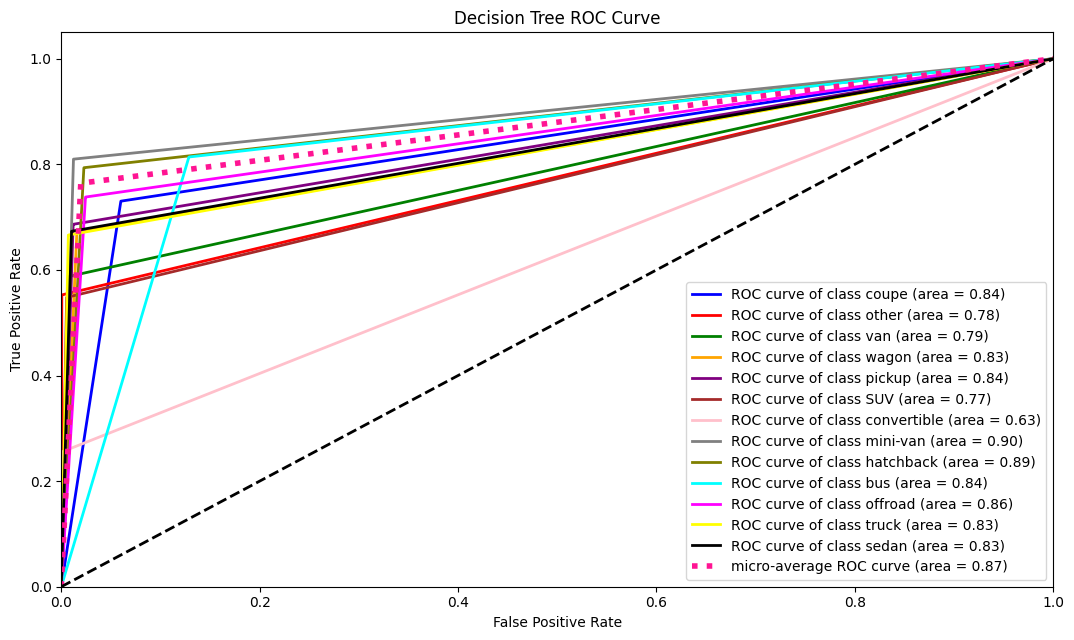

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11,12])
types = ['coupe', 'other', 'van', 'wagon', 'pickup', 'SUV', 'convertible', 'mini-van', 'hatchback', 'bus', 'offroad', 'truck', 'sedan']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(13):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_DT.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model_DT.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
fig = plt.gcf()
fig.set_size_inches(2 * fig.get_figwidth(), 1.5 * fig.get_figheight())
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black']
for i in range(13):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(types[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Naive Bayse Model

##Training Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# # create a new Categorical Naive Bayse Classifier Object
model_clf = GaussianNB()

# # splitting data
from sklearn.model_selection import train_test_split
X = df.drop(['type'],axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Train the Naive Bayes classifier
model_clf.fit(X_train, y_train)


GaussianNB()

##Generating Perfomance Metrics Report

In [27]:
from sklearn.metrics import classification_report

#Classification Report
print('\nClassification Report\n')

actual = y_test
predicted = model_clf.predict(X_test)

types=['pickup','truck','mini-van','hatchback','suv','coupe','bus','sedan','convertible','wagon','other','van','offroad',]

print(classification_report(actual, predicted, target_names=types))


Classification Report

              precision    recall  f1-score   support

      pickup       0.00      0.00      0.00     15368
       truck       0.00      0.00      0.00       119
    mini-van       0.00      0.00      0.00      1604
   hatchback       0.04      0.01      0.02      3841
         suv       0.05      0.63      0.10      3224
       coupe       0.02      0.28      0.04      1002
         bus       0.01      0.02      0.01       122
       sedan       0.10      0.57      0.16      4444
 convertible       0.00      0.00      0.00      8594
       wagon       0.50      0.00      0.00     36102
       other       0.16      0.01      0.01      7018
         van       0.00      0.00      0.00      1743
     offroad       0.02      0.05      0.03      2195

    accuracy                           0.06     85376
   macro avg       0.07      0.12      0.03     85376
weighted avg       0.23      0.06      0.02     85376



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

actual = y_test
predicted = model_clf.predict(X_test)


# accuracy
print('Accuracy: {:.2f}\n'.format(accuracy_score(actual,predicted)))

# micro
print('Micro Precision: {:.2f}'.format(precision_score(actual,predicted, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(actual,predicted, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(actual,predicted, average='micro')))

# macro
print('Macro Precision: {:.2f}'.format(precision_score(actual,predicted, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(actual,predicted, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(actual,predicted, average='macro')))

# weighted
print('Weighted Precision: {:.2f}'.format(precision_score(actual,predicted,  average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(actual,predicted,  average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(actual,predicted,  average='weighted')))



Accuracy: 0.06

Micro Precision: 0.06
Micro Recall: 0.06
Micro F1-score: 0.06

Macro Precision: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro Recall: 0.12
Macro F1-score: 0.03

Weighted Precision: 0.26
Weighted Recall: 0.06
Weighted F1-score: 0.02


##Generating ROC

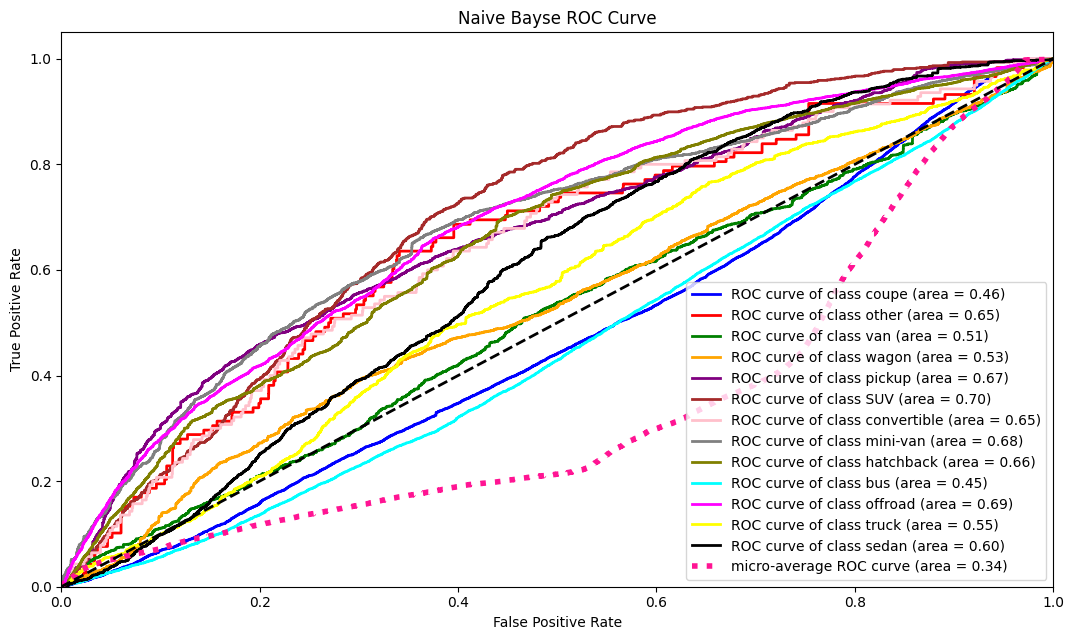

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11,12])
types = ['coupe', 'other', 'van', 'wagon', 'pickup', 'SUV', 'convertible', 'mini-van', 'hatchback', 'bus', 'offroad', 'truck', 'sedan']
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(13):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model_clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model_clf.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure()
fig = plt.gcf()
fig.set_size_inches(2 * fig.get_figwidth(), 1.5 * fig.get_figheight())
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black']
for i in range(13):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(types[i], roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayse ROC Curve')
plt.legend(loc="lower right")
plt.show()